In [108]:
%matplotlib inline

import hashlib
import pandas as pd
import matplotlib.pyplot as plt

idx = pd.IndexSlice

In [4]:
df = pd.read_csv('data/covid19data.csv')
df.head()

,date,Country,deaths,confirmed_cases
0,2020-01-26,Eswatini,0.0,0.0
1,2020-08-18,Burkina Faso,0.0,0.0
2,2020-06-29,Vietnam,0.0,0.0
3,2020-06-02,Congo (Kinshasa),0.0,131.0
4,2020-06-02,Lithuania,1.0,4.0


# Exercise 1) Multi Indexing

Convert the date column to datetime and make an index with [date,Country]. Don't forget to sort the index!

In [5]:
data = df.copy()

# data['date'] = ...
# data = ...
# data = ...

In [6]:
data['date'] = pd.to_datetime(data.date, infer_datetime_format=True)
data = data.set_index(['date', 'Country'])
data = data.sort_index()

In [33]:
data.head(5)

deaths  confirmed_cases
date       Country                             
2020-01-22 Afghanistan     0.0              0.0
           Albania         0.0              0.0
           Algeria         0.0              0.0
           Andorra         0.0              0.0
           Angola          0.0              0.0

In [36]:
expected_hash = 'e0a979cf8955d1e01188e855301a73abba801de72f4a402a85abb547e65c5d21'
assert hashlib.sha256(str(data.head(5)).encode()).hexdigest() == expected_hash
assert hashlib.sha256(str(data.index.dtype).encode()).hexdigest() == '2958d416d08aa5a472d7b509036cb7eafd542add84527e66a145ea64cb4cdc75'

## Exercise 2) Subsetting

#### Exercise 2.1) What day was it when the daily deaths was highest in Panama?

The answer should be a timestamp

In [49]:
# panama_highest_daily_death_count = ...

In [48]:
expected_hash = 'ed0c76c6b39b295bd9fdf73e0bc2bd6b8323d78a900524132dd549cb346f3ccc'

assert hashlib.sha256(str(panama_highest_daily_death_count).encode()).hexdigest() == expected_hash

#### Exercise 2.2) In October 31st, what were the top 5 countries whose confirmed cases rose the most since the day before?

In [57]:
# top5countries_highest_variation_confirmed_cases = ...

In [58]:
expected_hash = '4de492257a7ec8ff74ca976f169d81a9a22cc9db957c857d07d70499b66a013e'

assert hashlib.sha256(str(top5countries_highest_variation_confirmed_cases).encode()).hexdigest() == expected_hash

#### Exercise 2.3) best day of the week to go for a walk?

It's September at the moment. You and your friends are visiting Spain and are wondering what day of the week is safest to go take a long walk through the city. So you decide to check throughout the whole of August which day of the week has had the least number of daily new confirmed cases in total.

_hint_ you may want to first add a new column with the weekday's name

In [68]:
# ToDo 

# weekday = <--- expecting a just a string with the weekday's name with the first letter Capital.

In [73]:
expected_hash = '7d8af1de1262f150187d5938bf649d6c35726970685f916d1ec6392a801b9762'

assert hashlib.sha256(str(weekday).encode()).hexdigest() == expected_hash

# Exercise 3

#### Exercise 3.1) Top 3 countries with all-time most confirmed cases

The answer should be a series format with the index being the 3 countries and the values being the total number of confirmed cases

In [84]:
# top3_most_confirmed = ...

In [86]:
expected_hash = '6338b0768beea9ce516a65ad49bf9d6b18fd9fa6ccb1f14dc62881ee4caa2ac3'

assert hashlib.sha256(str(top3_most_confirmed).encode()).hexdigest() == expected_hash

#### Exercise 3.2) What's the country where the percentage change of deaths is smallest from  November 2nd to the 3rd?


The answer should be a string.

In [103]:
# country_smallest_death_variation = ...

In [139]:
#data.index.get_level_values(1).tolist()

In [105]:
expected_hash = '71e9eb10755c8232974d186a560f7658a1ccbdd3097877dfa1ad3436af90d46a'

assert hashlib.sha256(str(country_smallest_death_variation).encode()).hexdigest() == expected_hash

# Extras - Plotting

You've reach the end. Congratulations! As a reward I'll show you one more trick you can do with plotting in time series.

We can compare data across countries in a very nice way in Pandas. Let's Compare Portugal's with Italy's.

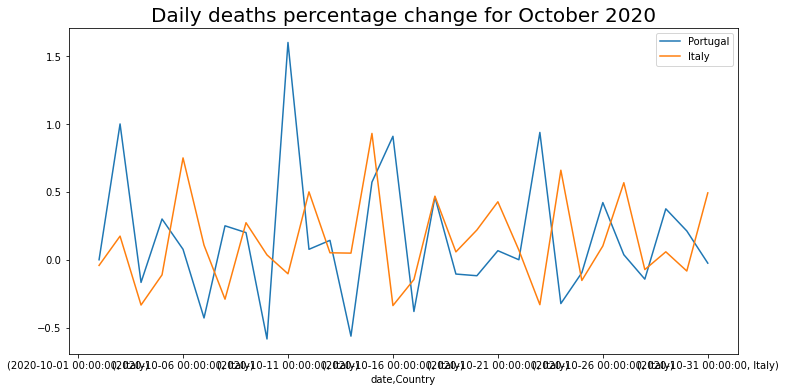

In [144]:
plt.figure(figsize=(12,6))
portugal_data = data.loc[idx['October 2020', 'Portugal'], 'deaths'].pct_change()
italy_data = data.loc[idx['October 2020', 'Italy'], 'deaths'].pct_change()

portugal_data.plot(label='Portugal')
italy_data.plot(label='Italy')
plt.title('Daily deaths percentage change for October 2020', fontsize=20)
plt.legend()